In [1]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Using TensorFlow backend.
/opt/anaconda/lib/python3.6/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


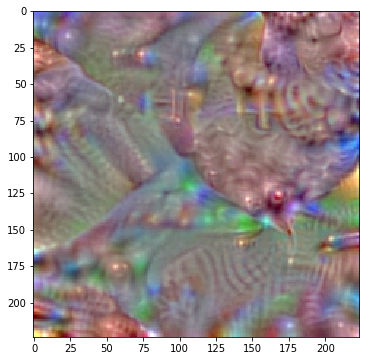

In [2]:

from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=20)
plt.imshow(img)

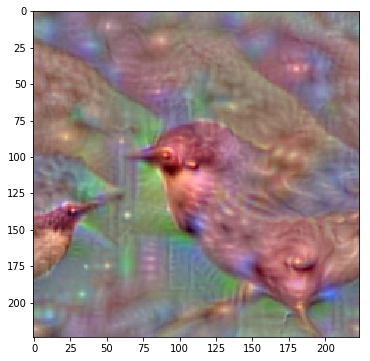

In [4]:
from vis.input_modifiers import Jitter

# 20 is the imagenet category for 'ouzel'
# Jitter 16 pixels along all dimensions to during the optimization process.
img = visualize_activation(model, layer_idx, filter_indices=20, max_iter=500, input_modifiers=[Jitter(16)])
plt.imshow(img)

In [11]:
import numpy as np
categories = np.random.permutation(1000)[:15]

vis_images = []
image_modifiers = [Jitter(16)]
for idx in categories:    
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=500, input_modifiers=image_modifiers)
    
    # Reverse lookup index to imagenet label and overlay it on the image.
    img = utils.draw_text(img, utils.get_imagenet_label(idx))
    vis_images.append(img)


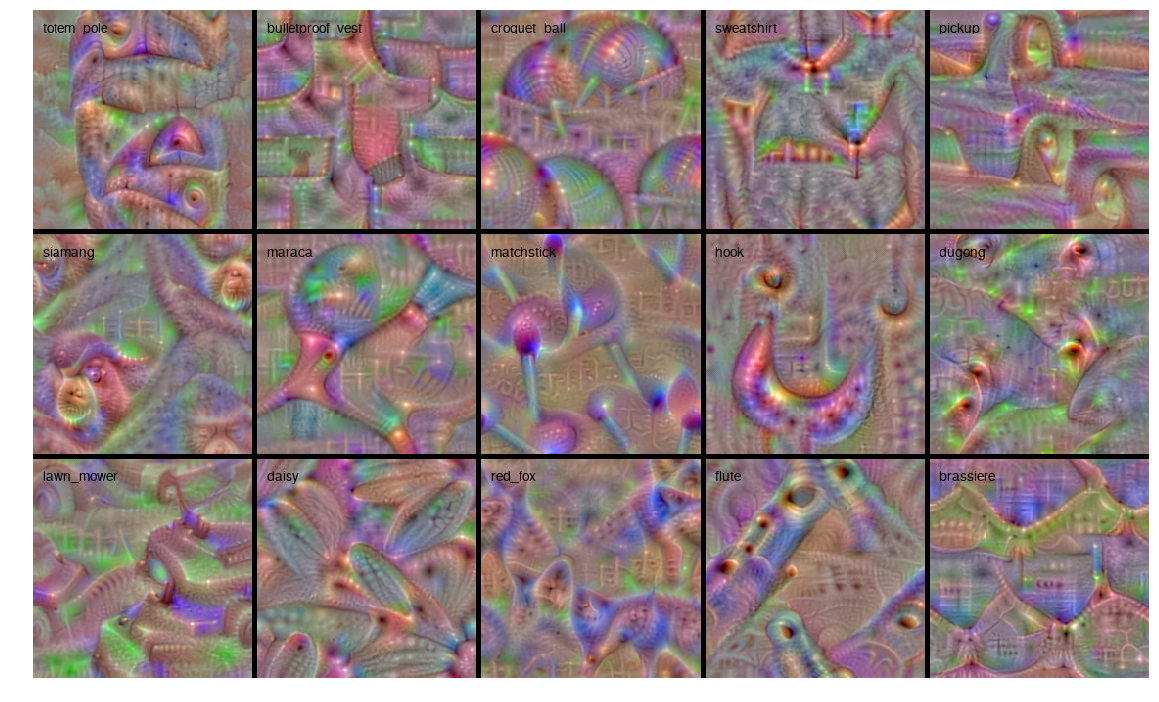

In [12]:
# Generate stitched images with 5 cols (so it will have 3 rows).
plt.rcParams['figure.figsize'] = (20, 20)
stitched = utils.stitch_images(vis_images, cols=5)
plt.axis('off')
plt.imshow(stitched)
plt.show()